In [16]:
import numpy as np 
import pandas as pd

from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import load_img
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers



In [17]:
class_names = ['0','1','2','3']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
nb_classes = len(class_names)
IMAGE_SIZE = (128, 128)

In [18]:

## Function definition
def load_data():
    
    datasets = ['/home/sky/Desktop/driver_drowsiness/dataset/train', '/home/sky/Desktop/driver_drowsiness/dataset/test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            curr_label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in os.listdir(os.path.join(dataset, folder)):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                curr_img = cv2.imread(img_path)
                curr_img = cv2.resize(curr_img, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(curr_img)
                labels.append(curr_label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

## Function Call
(train_images, train_labels), (test_images, test_labels) = load_data()


Loading /home/sky/Desktop/driver_drowsiness/dataset/train
Loading /home/sky/Desktop/driver_drowsiness/dataset/test


In [20]:
from sklearn.utils import shuffle           
train_images = train_images / 255.0 
test_images = test_images / 255.0

train_images, train_labels = shuffle(train_images, train_labels)

In [21]:
train_images.shape

(2467, 150, 150, 3)

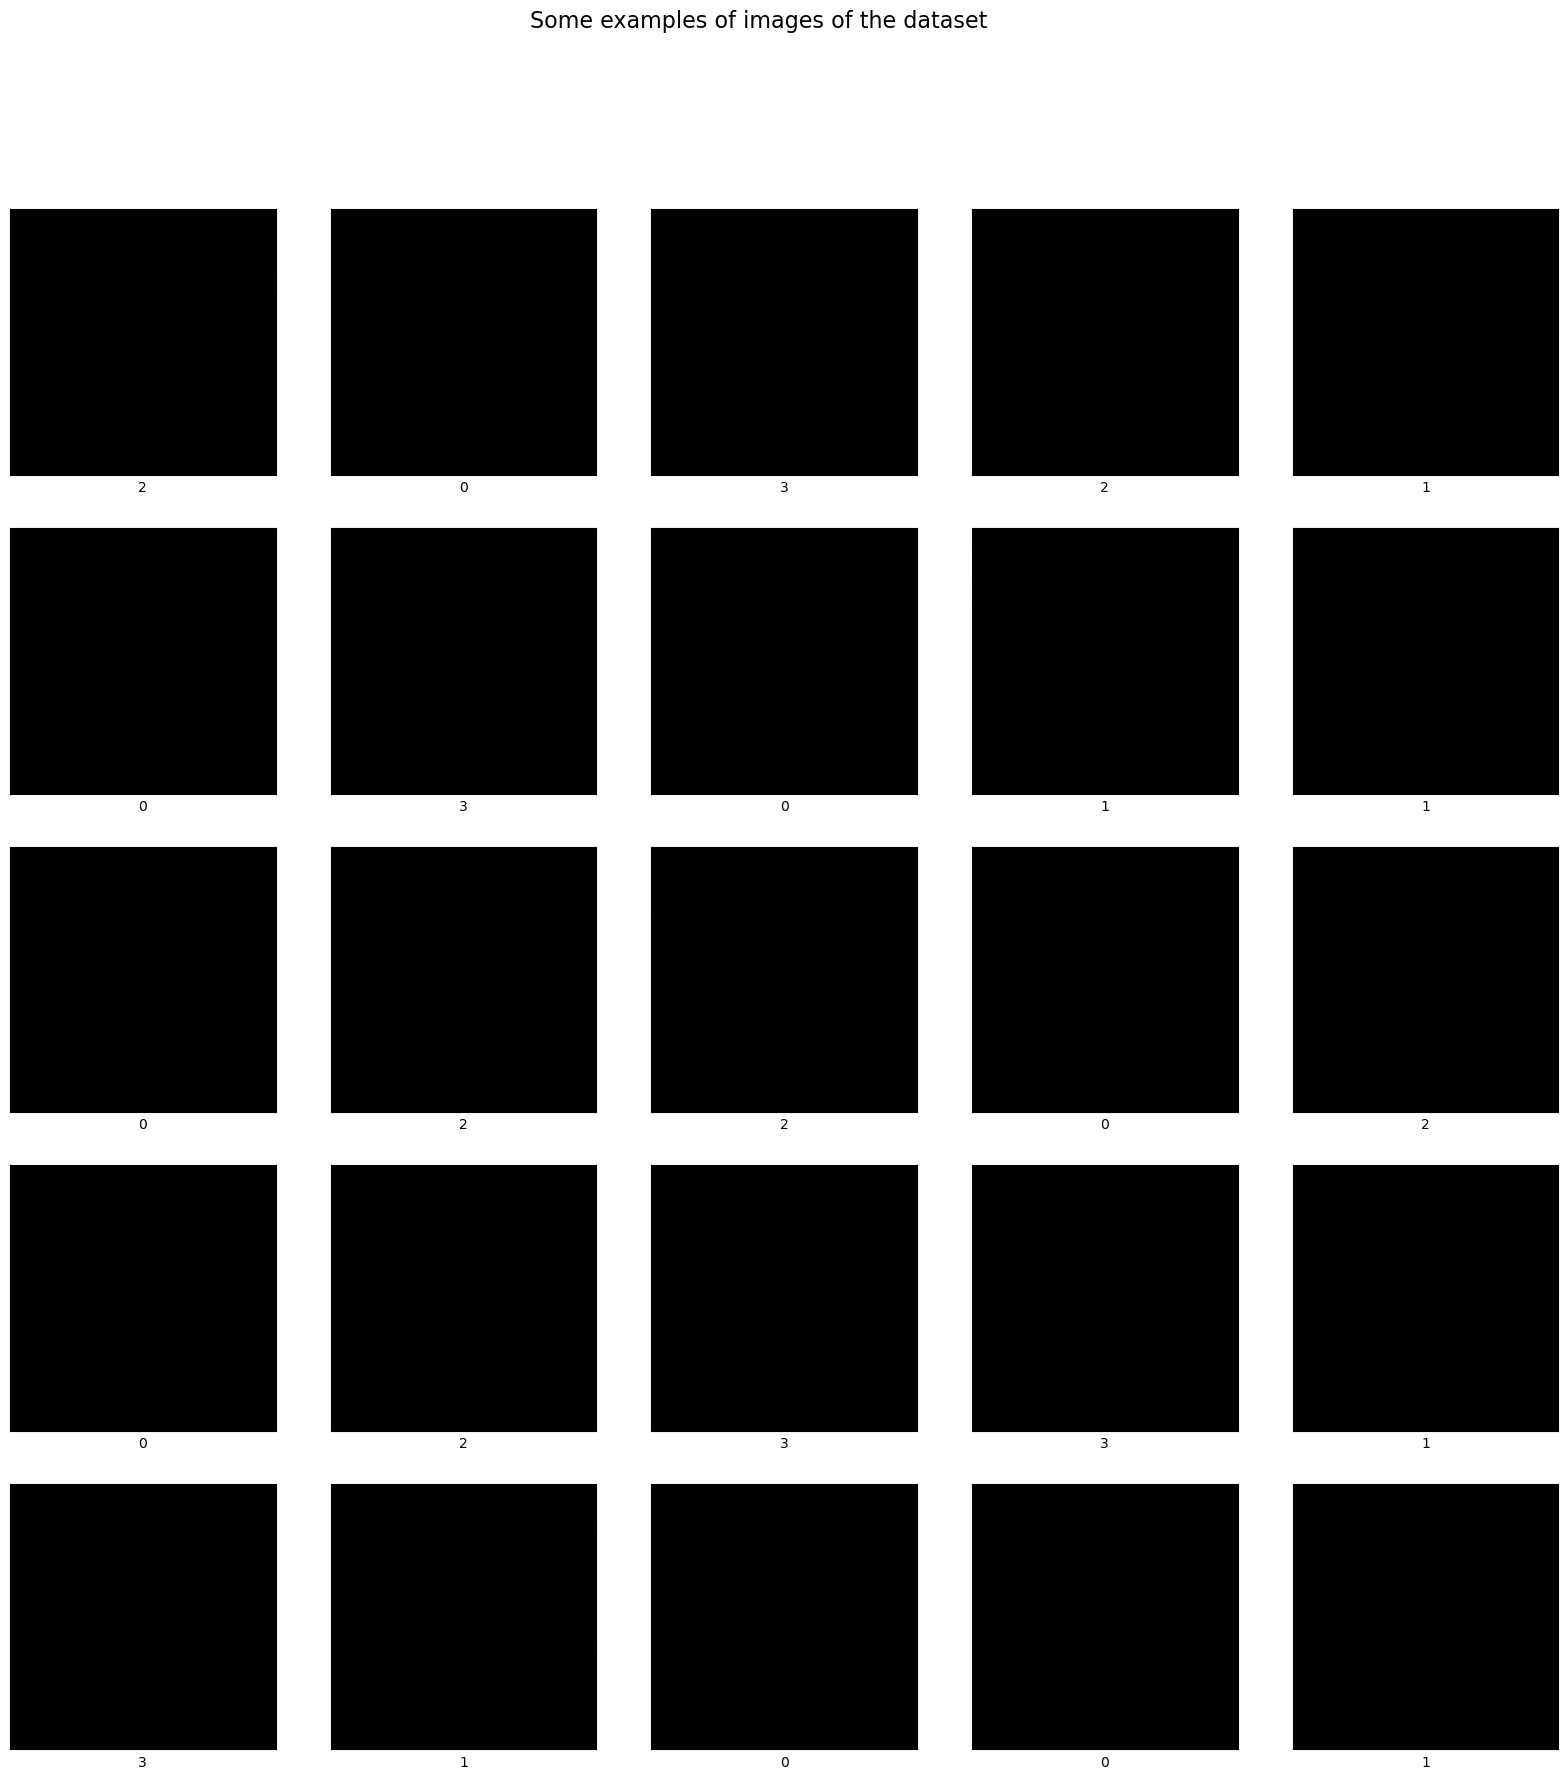

In [22]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(20,20))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        plt.xlabel(class_names[labels[i]])
    plt.show()

    ## Function call
display_examples(class_names, train_images, train_labels)


In [23]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(train_labels, 4)
y_test = np_utils.to_categorical(test_labels, 4)

In [24]:
train_gen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')


In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, BatchNormalization, Flatten
from keras.optimizers import Adam
from keras.applications.mobilenet import MobileNet
model = MobileNet(input_shape = (128,128,3), dropout = 0.25, weights = None, 
                  classes = 4)
model.compile(loss = 'categorical_crossentropy', 
               optimizer = Adam(lr = 1e-4, decay = 1e-6),
               metrics = ['acc'])
loss_history = []
model.summary()

Model: "mobilenet_1.00_150"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 75, 75, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 75, 75, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 75, 75, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 75, 75, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 75, 75, 32)       128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 9, 9, 512)        2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 9, 9, 512)         0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 9, 9, 512)        4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 9, 9, 512)        2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 9, 9, 512)         0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 9, 9, 512)         262144    
                                                                 
 conv_pw_9

In [ ]:
for i in range(30):
    #print("EPOCH : ",i)
    loss_history += [model.fit_generator(train_gen.flow(train_images, y_train, batch_size=32),
                              steps_per_epoch=len(train_images) / 64,
                              validation_data = (test_images, y_test))]


/tmp/ipykernel_6017/1692813439.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  loss_history += [model.fit_generator(train_gen.flow(train_images, y_train, batch_size=32),
2023-06-08 16:53:38.660799: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


39/38 [==============================] - ETA: -1s - loss: 0.9162 - acc: 0.5160

2023-06-08 16:56:30.275624: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 116910000 exceeds 10% of free system memory.


38/38 [==============================] - 186s 5s/step - loss: 0.9162 - acc: 0.5160 - val_loss: 1.4184 - val_acc: 0.2517


2023-06-08 16:56:46.452531: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


24/38 [=================>............] - ETA: 57s - loss: 0.7845 - acc: 0.5751 

In [18]:
#model.save("/mobileNet_model.h5")